In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#**Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import Data: we have collected SMS Spam Classifcation  data from UCI machine learning repository at (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)**

In [0]:
filepath="/content/drive/Shared drives/CMPE_255_Data_Mining/data/SMSSpamCollection.csv"

In [4]:
# Readind data from .csv file and storing into dataframe
df = pd.read_csv(filepath,delimiter=',',header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df_copy=df

In [0]:
#renaming columns
df=df.rename(columns={0: 'label', 1: "SMS"})

# **Data Visulaization**

In [7]:
#print numbe of instances in each class.
print(df.label.value_counts())

ham     4825
spam     747
Name: label, dtype: int64


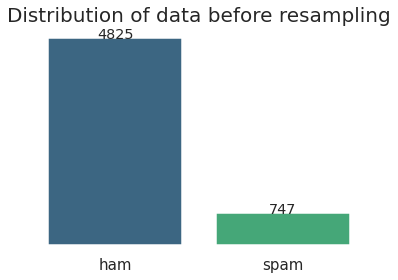

In [8]:
#Plot a graph to visualize class ditribution
sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)
fig, ax = plt.subplots()
g = sns.countplot(df.label, palette='viridis')
g.set_xticklabels(['ham', 'spam'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of data before resampling', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

**Plot wordcloud**

In [0]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

In [0]:
def stemming(tokens):
    ps=PorterStemmer()
    stem_words=[]
    for x in tokens:
        stem_words.append(ps.stem(x))
    return stem_words

In [0]:
def create_Word_Corpus(df):
    words_corpus = ''
    for val in df[1]:
        text = val.lower()
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in string.punctuation]
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = stemming(tokens)
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [0]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
   # plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

wordcloud = WordCloud(width=600, height=400).generate(create_Word_Corpus(df_copy))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


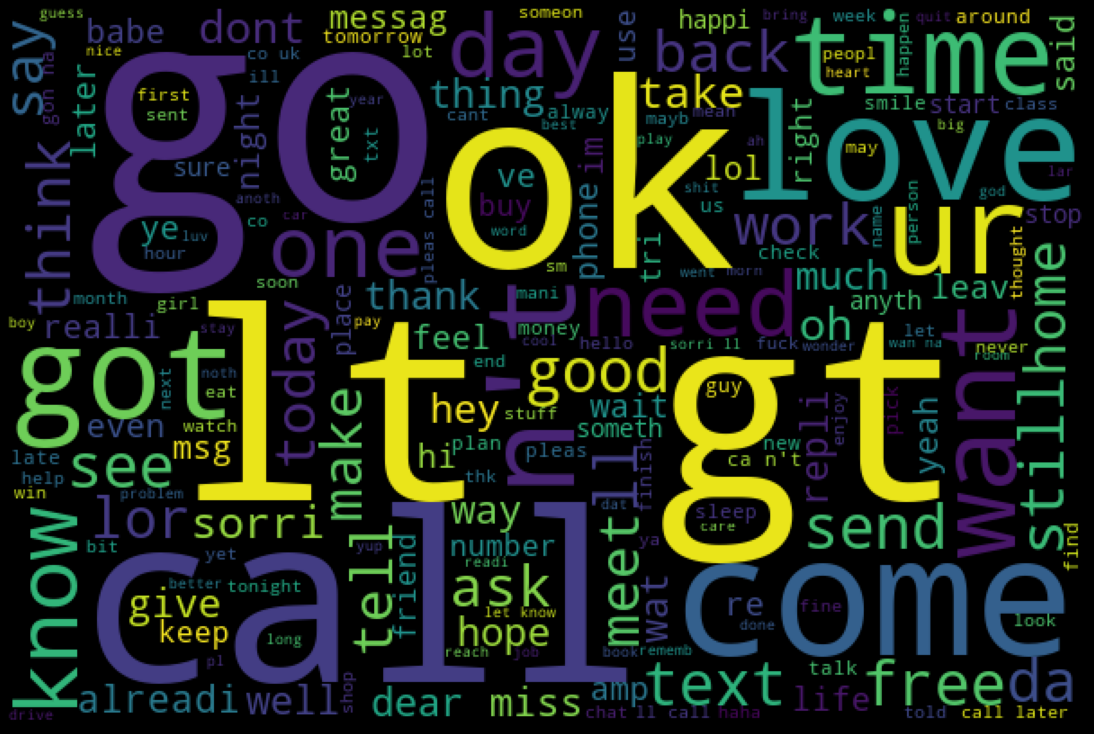

In [14]:
plot_Cloud(wordcloud)

# **Data Preprocessing**

**Remove punctuation**

In [15]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

df["SMS_clean"] = df["SMS"].apply(lambda x: remove_punct(x))

df.head()

,label,SMS,SMS_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


**Tokenization**

In [17]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['SMS_tokenized'] = df['SMS_clean'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 

df.head()

,label,SMS,SMS_clean,SMS_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


**Remove Stopwords**

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stopword = nltk.corpus.stopwords.words('english')

In [20]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

df['SMS_nostopwords'] = df['SMS_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,label,SMS,SMS_clean,SMS_tokenized,SMS_nostopwords
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


**Stemming**

In [21]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['SMS_stemmed'] = df['SMS_nostopwords'].apply(lambda x: stemming(x))

df.head()

,label,SMS,SMS_clean,SMS_tokenized,SMS_nostopwords,SMS_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."


In [22]:
df['length'] = df['SMS'].apply(len)
df.head()

,label,SMS,SMS_clean,SMS_tokenized,SMS_nostopwords,SMS_stemmed,length
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre...",111
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",155
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]",49
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...",61


In [0]:
def pre_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

**TF-IDF**

In [0]:
textFeatures = df['SMS'].copy()
textFeatures = textFeatures.apply(pre_process)
vectorizer = TfidfVectorizer("english")
features = vectorizer.fit_transform(textFeatures)

In [25]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='english', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

**Handling data imbalance using SMOTE technique.**

In [26]:
from imblearn.over_sampling import SMOTE

# setting up testing and training sets
features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
features_train, labels_train = sm.fit_sample(features_train, labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
df_concat = pd.concat([pd.DataFrame(features_train), pd.DataFrame(labels_train)], axis=1)


In [0]:
df_concat.columns = df_copy.columns

In [29]:
df_concat.head()

,0,1
0,"(0, 6240)\t0.32026769393115484\n (0, 5358)\...",ham
1,"(0, 4327)\t0.2752327856939972\n (0, 8076)\t...",ham
2,"(0, 1120)\t0.3734219326878862\n (0, 3148)\t...",ham
3,"(0, 6328)\t0.5370960111204744\n (0, 6808)\t...",ham
4,"(0, 3371)\t0.4825104080805349\n (0, 2972)\t...",ham


In [0]:
df_concat=df_concat.rename(columns={0: 'SMS', 1: "label"})

In [31]:
df_concat

,SMS,label
0,"(0, 6240)\t0.32026769393115484\n (0, 5358)\...",ham
1,"(0, 4327)\t0.2752327856939972\n (0, 8076)\t...",ham
2,"(0, 1120)\t0.3734219326878862\n (0, 3148)\t...",ham
3,"(0, 6328)\t0.5370960111204744\n (0, 6808)\t...",ham
4,"(0, 3371)\t0.4825104080805349\n (0, 2972)\t...",ham
...,...,...
7259,"(0, 137)\t0.0318500283548484\n (0, 167)\t0....",spam
7260,"(0, 214)\t0.24156489745175092\n (0, 215)\t0...",spam
7261,"(0, 245)\t0.19569164085029989\n (0, 246)\t0...",spam
7262,"(0, 99)\t0.04631068673146384\n (0, 157)\t0....",spam


In [32]:
print(df_concat.label.value_counts())

spam    3632
ham     3632
Name: label, dtype: int64


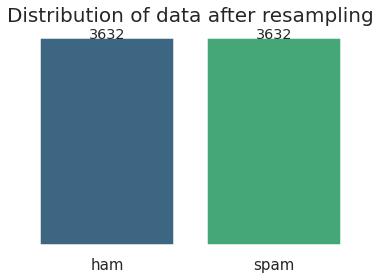

In [33]:
# plot a class distribution graph to visualize balanced dataset.
fig, ax = plt.subplots()
g = sns.countplot(df_concat.label, palette='viridis')
g.set_xticklabels(['ham', 'spam'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of data after resampling', fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [0]:
#features_train, features_test, labels_train, labels_test = train_test_split(features, df['label'], test_size=0.25, random_state=0)

In [0]:
accuracy_list=[]
f1_score_list=[]
classifiers_list=[]
titles=[]

# **Classification Algorithms**

**SVM**

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
accuracy=accuracy_score(labels_test,prediction)
f1=f1_score(labels_test,prediction,average='macro')
print(accuracy)
print(f1)
accuracy_list.append(accuracy)
f1_score_list.append(f1)
classifiers_list.append(svc)
titles.append('SVM')

0.9820531227566404
0.9623263034341751


**Multinominal Naive Bayes**

In [37]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=0.2)
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
accuracy=accuracy_score(labels_test,prediction)
f1=f1_score(labels_test,prediction,average='macro')
print(accuracy)
print(f1)
accuracy_list.append(accuracy)
f1_score_list.append(f1)
classifiers_list.append(mnb)
titles.append('Naive Bayes')

0.9734386216798278
0.946551143051213


**Decision Tree Classifier**

In [38]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(features_train,labels_train)
prediction = clf.predict(features_test)
accuracy=accuracy_score(labels_test,prediction)
f1=f1_score(labels_test,prediction,average='macro')
print(accuracy)
print(f1)
accuracy_list.append(accuracy)
f1_score_list.append(f1)
classifiers_list.append(clf)
titles.append('Decision Tree')

0.9519023689877961
0.903999514499693


**KNN**

3


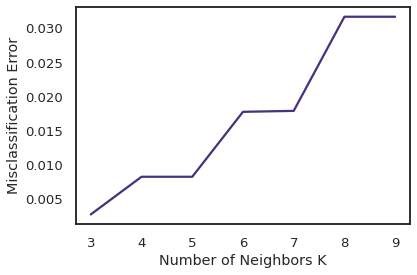

In [39]:
# Selecting the bset k for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neighbors=[x for x in range(3,10)]
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features_train, labels_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [40]:
# KNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(features_train,labels_train)
prediction = neigh.predict(features_test)
accuracy=accuracy_score(labels_test,prediction)
f1=f1_score(labels_test,prediction,average='macro')
print(accuracy)
print(f1)
accuracy_list.append(accuracy)
f1_score_list.append(f1)
classifiers_list.append(neigh)
titles.append('KNN')

0.9440057430007178
0.8659387029908203


**Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lgtr = LogisticRegression()
lgtr.fit(features_train,labels_train)
prediction = clf.predict(features_test)
accuracy=accuracy_score(labels_test,prediction)
f1=f1_score(labels_test,prediction,average='macro')
print(accuracy)
print(f1)
accuracy_list.append(accuracy)
f1_score_list.append(f1)
classifiers_list.append(lgtr)
titles.append('Logistic Regression')

0.9519023689877961
0.903999514499693


**MLP classifier**

In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(500,500))
mlp.fit(features_train,labels_train)
prediction = mlp.predict(features_test)
accuracy=accuracy_score(labels_test,prediction)
f1=f1_score(labels_test,prediction,average='macro')
print(accuracy)
print(f1)
accuracy_list.append(accuracy)
f1_score_list.append(f1)
classifiers_list.append(mlp)
titles.append('MLP')

0.9791816223977028
0.9551168880805379


In [0]:
classifiers=[]
classifiers.insert(0,"SVM")
classifiers.insert(1,"NB")
classifiers.insert(2,'Dec_Tree')
classifiers.insert(3,'K-NN')
classifiers.insert(4,'LR')
classifiers.insert(5,'NN')

#**Model Evaluation**

**Comparision of accuracy of different algorithms**

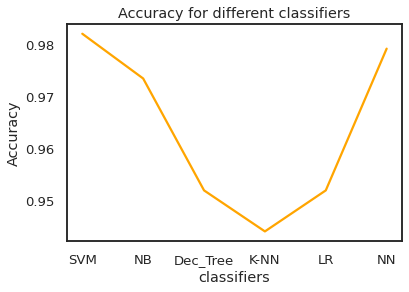

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.plot(classifiers, accuracy_list, color='orange')
plt.xticks(classifiers, classifiers)
plt.xlabel('classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy for different classifiers')
#lt.grid(linestyle='dotted')

#plt.savefig('evaluation.png')
plt.show()

**Comparision of F1-score values of different algorithms**

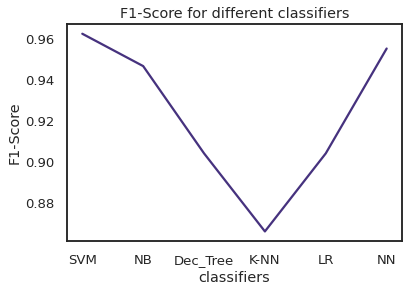

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.plot(classifiers, f1_score_list)
plt.xticks(classifiers, classifiers)
plt.xlabel('classifiers')
plt.ylabel('F1-Score')
plt.title('F1-Score for different classifiers')
#plt.grid(linestyle='dotted')

#plt.savefig('evaluation.png')
plt.show()